<h1>Exploration Data Analysis</h1>

<h3> Objectives </h3>
<li>Perform EDA on our data set</li>

<h2>Import Libraries </h2>

In [1]:
# Load our imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import pylab
import math
import geopandas
import folium

In [2]:
#initialize our dataset
data = pd.read_csv("astronaut_data/missions.csv") 

In [3]:
# examine first few lines of our dataset
data.head(10)

,Unnamed: 0,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [4]:
# drop this column
data = data.drop(columns='Unnamed: 0')

In [5]:
# examine rows and columns
print(data.shape)
# basic stats of our data
print(data.describe())
# understand our dtypes and what we're working with (time series, int, object, float, etc.)
print(data.info())
# total of each dtype
print(data.dtypes.value_counts())

(4324, 8)
                ID
count  4324.000000
mean   2161.500000
std    1248.375611
min       0.000000
25%    1080.750000
50%    2161.500000
75%    3242.250000
max    4323.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              4324 non-null   int64 
 1   Company Name    4324 non-null   object
 2   Location        4324 non-null   object
 3   Date            4324 non-null   object
 4   Detail          4324 non-null   object
 5   Status Rocket   4324 non-null   object
 6    Cost           964 non-null    object
 7   Status Mission  4324 non-null   object
dtypes: int64(1), object(7)
memory usage: 270.4+ KB
None
object    7
int64     1
dtype: int64


<h2>Cleaning Data </h2>

In [6]:
# we see an extra white space infront of Cost, let's fix this
data = data.rename(columns={' Cost': 'Cost'})

In [7]:
# examine any missing data
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

Cost              77.705828
ID                 0.000000
Company Name       0.000000
Location           0.000000
Date               0.000000
Detail             0.000000
Status Rocket      0.000000
Status Mission     0.000000
dtype: float64

<AxesSubplot:>

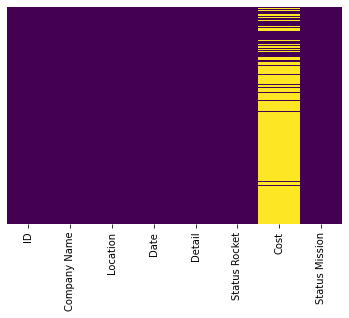

In [8]:
# heat map for visual representation of empty values
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [9]:
# we see our Date column is an object, let's change this it datetime for future models
# overwriting data after changing format
data["Date"]= pd.to_datetime(data["Date"],utc=True)
# info of data showing the change 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   ID              4324 non-null   int64              
 1   Company Name    4324 non-null   object             
 2   Location        4324 non-null   object             
 3   Date            4324 non-null   datetime64[ns, UTC]
 4   Detail          4324 non-null   object             
 5   Status Rocket   4324 non-null   object             
 6   Cost            964 non-null    object             
 7   Status Mission  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 270.4+ KB


In [10]:
print(len(data))
data.duplicated() # Check whether a row is a duplicated version of a previous row
data.duplicated().sum() # Compute the number of duplicated rows

4324


0

In [11]:
# take away any question marks or punctuation in the Company Name column
# function to replace ? in our column
def replace_marks(x):
    return x.replace('?','')
data['Company Name'] = data['Company Name'].apply(replace_marks)

<h2>Data Visualization </h2>

In [12]:
print(data['Company Name'].nunique())
print(data['Status Mission'].nunique())
print(data['Status Rocket'].nunique())
print(data['Detail'].nunique())

56
4
2
4278


Text(0, 0.5, 'Company')

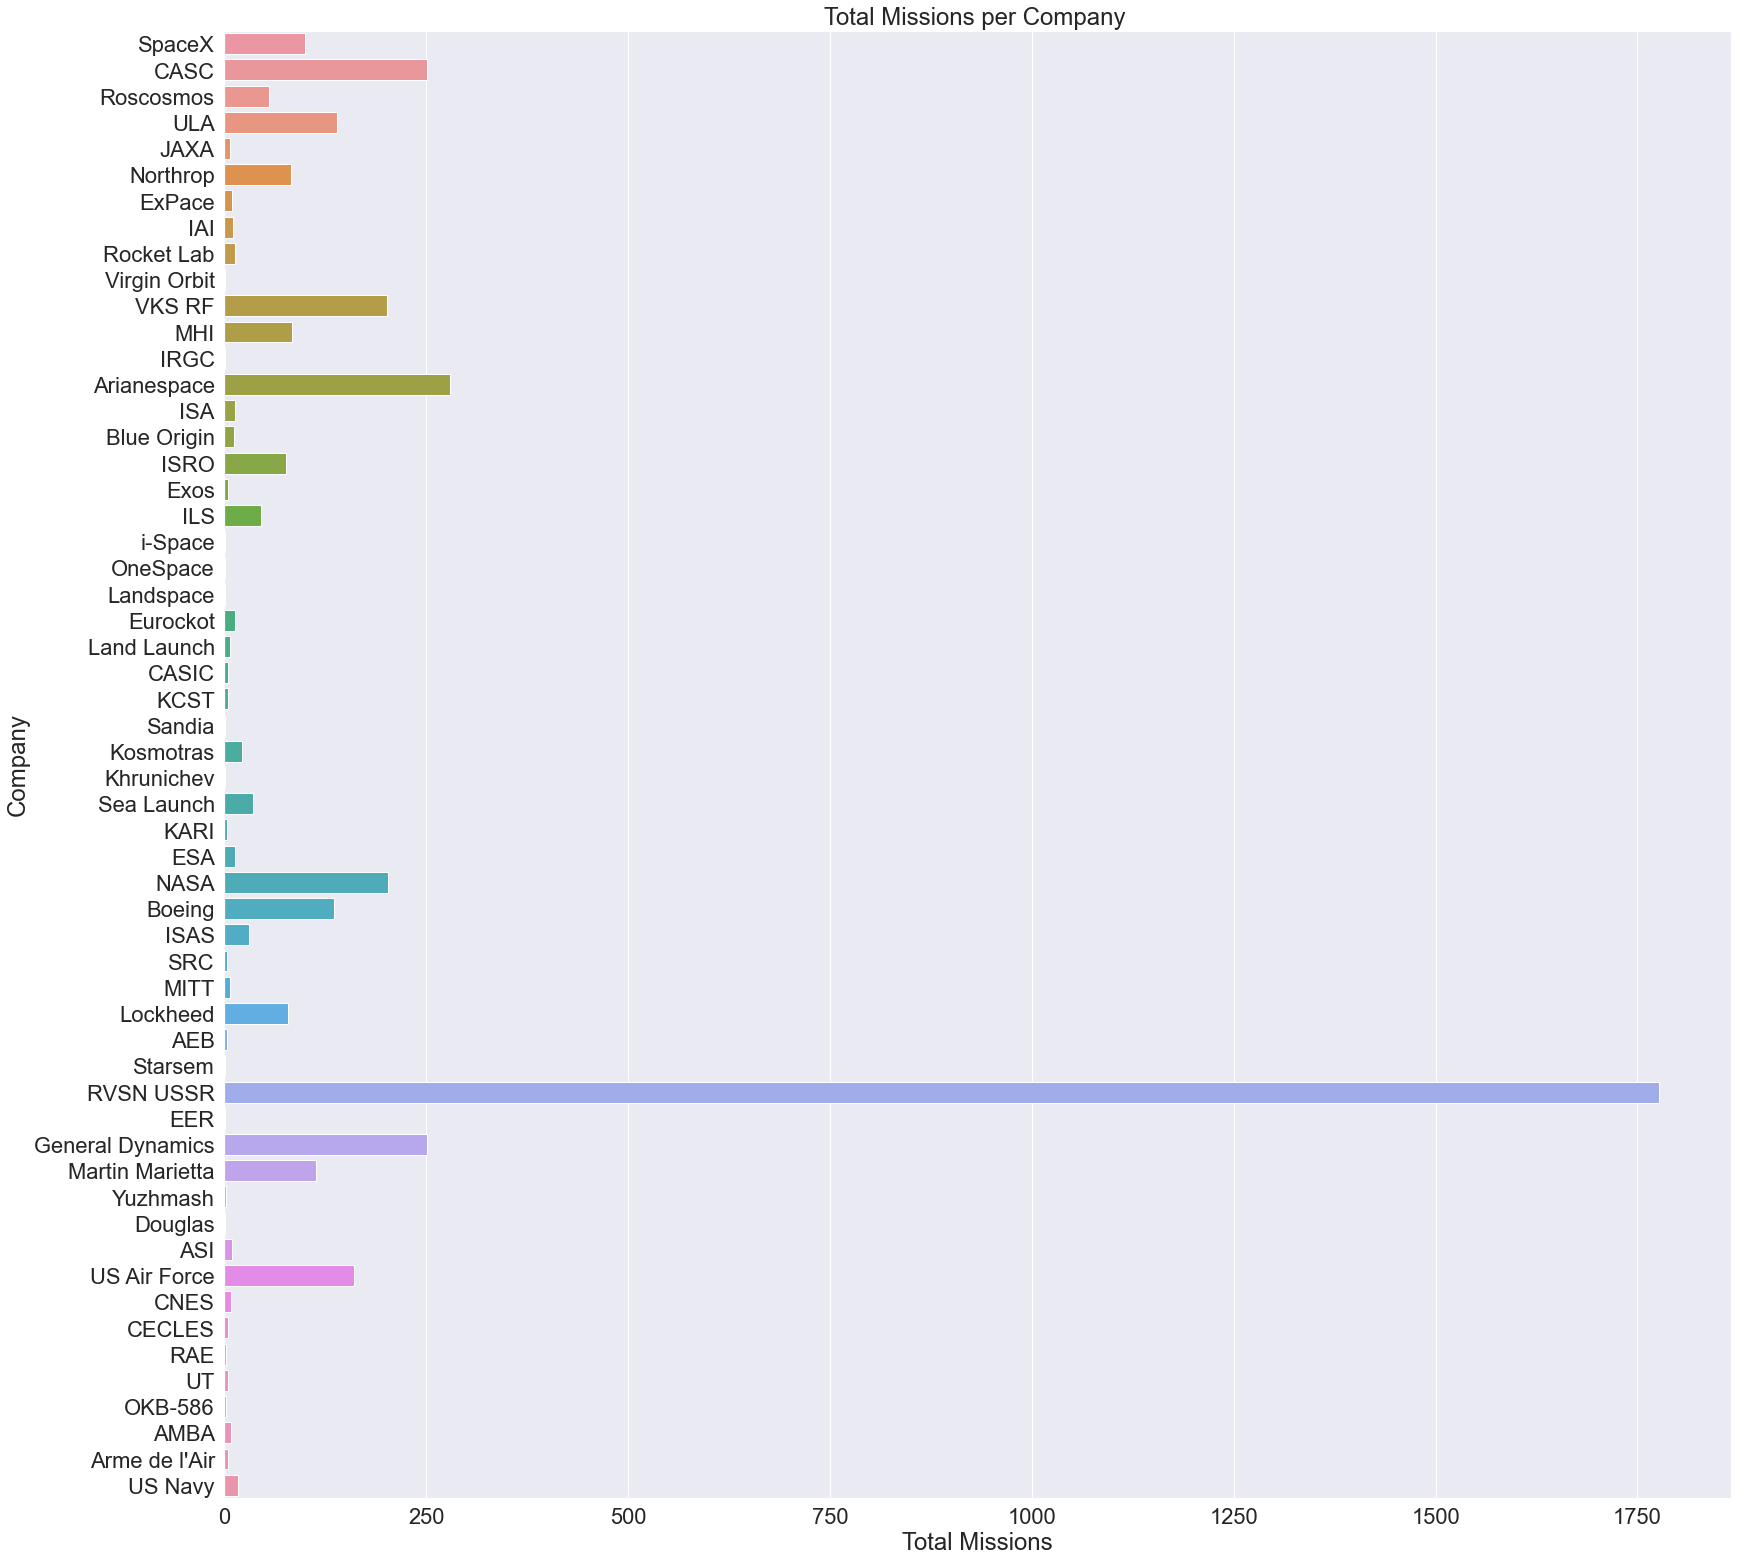

In [13]:
plt.figure(figsize=(27,27))
sns.set(font_scale = 2)

ax = sns.countplot(y='Company Name', data=data)
ax.set_title("Total Missions per Company ")
ax.set_xlabel('Total Missions')
ax.set_ylabel('Company')

In [14]:
# lets find the Count of all unique values 
data['Cost'].value_counts(ascending=False)

450.0      136
200.0       75
40.0        55
62.0        41
30.8        38
109.0       37
50.0        34
64.68       34
29.75       33
90.0        32
41.8        31
48.5        26
29.15       25
31.0        22
29.0        22
59.0        22
69.7        17
21.0        16
65.0        16
35.0        16
56.5        15
37.0        15
164.0       15
7.5         14
1,160.0     13
47.0        13
25.0        12
350.0       11
153.0       11
45.0        10
112.5        9
5.3          9
123.0        8
145.0        7
85.0         7
120.0        7
80.0         7
115.0        6
59.5         5
7.0          5
46.0         5
136.6        4
63.23        4
140.0        3
133.0        3
190.0        3
130.0        3
135.0        2
5,000.0      2
39.0         2
55.0         1
15.0         1
20.14        1
20.0         1
12.0         1
28.3         1
Name: Cost, dtype: int64

<h3>Let's examine SpaceX</h3>

In [15]:
# Filter for SpaceX
space_x = data[data['Company Name'] == 'SpaceX']

In [16]:
space_x

,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
17,17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-06-30 20:10:00+00:00,Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success
20,20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-06-13 09:21:00+00:00,Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.0,Success
...,...,...,...,...,...,...,...,...
763,763,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2009-07-14 03:35:00+00:00,Falcon 1 | RazakSat,StatusRetired,7.0,Success
800,800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2008-09-28 23:15:00+00:00,Falcon 1 | RatSat,StatusRetired,7.0,Success
808,808,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2008-08-03 03:34:00+00:00,Falcon 1 | Flight 3,StatusRetired,7.0,Failure
879,879,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2007-03-21 01:10:00+00:00,Falcon 1 | DemoSat,StatusRetired,7.0,Failure


In [17]:
space_x[space_x['Cost'].isna()] 

#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy='mean')# Instanciate a SimpleImputer object with strategy of choice
imputer.fit(space_x[['Cost']]) # Call the "fit" method on the object
space_x['Cost'] = imputer.transform(space_x[['Cost']]) # Call the "transform" method on the object
imputer.statistics_ # The mean is stored in the transformer's memory

/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_53022/2840704558.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  space_x['Cost'] = imputer.transform(space_x[['Cost']]) # Call the "transform" method on the object


array([54.98989899])

Text(0.5, 0, 'Cost in Millions')

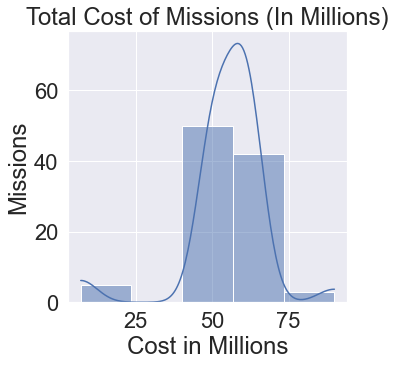

In [46]:
plt.figure(figsize=(5,5))

bx = sns.histplot(x='Cost', kde=True, data=space_x,bins=5)
bx.set_title("Total Cost of Missions (In Millions)")
bx.set_ylabel('Missions')
bx.set_xlabel('Cost in Millions')


<h3> Measure the USA v Russia in success rate with missions </h3>

<h4>USA </h4>

In [19]:
# Lets group each location by Country and measure it's Mission Status 
usa = data[data['Location'].str.contains("USA")]
usa['Status Mission'].value_counts()

Success              1186
Failure               127
Partial Failure        30
Prelaunch Failure       1
Name: Status Mission, dtype: int64

In [20]:
# lets define status mission by either success or failure
usa['Status Mission'] = usa['Status Mission'].replace(['Partial Failure'],'Failure')
usa['Status Mission'] = usa['Status Mission'].replace(['Prelaunch Failure'],'Failure')

/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_53022/1013442665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['Status Mission'] = usa['Status Mission'].replace(['Partial Failure'],'Failure')
/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_53022/1013442665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa['Status Mission'] = usa['Status Mission'].replace(['Prelaunch Failure'],'Failure')


In [21]:
# find total number of success and failure
usa['Status Mission'].value_counts()

Success    1186
Failure     158
Name: Status Mission, dtype: int64

Percentage of success rate


Text(0, 0.5, 'Count')

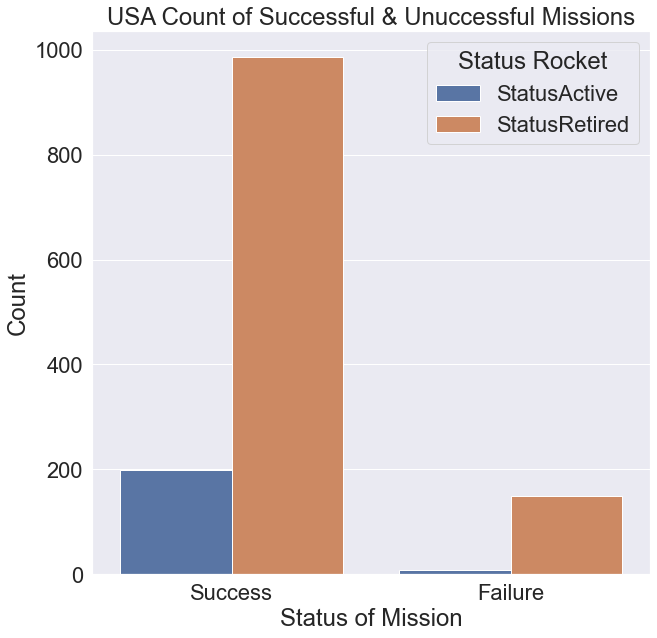

In [22]:
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)

cx = sns.countplot(x='Status Mission', hue='Status Rocket', data=usa)
print('Percentage of success rate')

cx.set_title("USA Count of Successful & Unuccessful Missions")
cx.set_xlabel('Status of Mission')
cx.set_ylabel('Count')

In [23]:
# USA has 63% of missing values for Cost
(usa.isnull().sum().sort_values(ascending=False)/len(usa))*100

Cost              63.764881
ID                 0.000000
Company Name       0.000000
Location           0.000000
Date               0.000000
Detail             0.000000
Status Rocket      0.000000
Status Mission     0.000000
dtype: float64

In [24]:
usa['Status Rocket'].value_counts()

StatusRetired    1136
StatusActive      208
Name: Status Rocket, dtype: int64

In [25]:
usa['Location'].value_counts()

LC-39A, Kennedy Space Center, Florida, USA                                                 120
SLC-40, Cape Canaveral AFS, Florida, USA                                                   111
SLC-41, Cape Canaveral AFS, Florida, USA                                                    97
SLC-4W, Vandenberg AFB, California, USA                                                     93
SLC-4E, Vandenberg AFB, California, USA                                                     83
SLC-17A, Cape Canaveral AFS, Florida, USA                                                   80
SLC-36B, Cape Canaveral AFS, Florida, USA                                                   75
SLC-36A, Cape Canaveral AFS, Florida, USA                                                   70
SLC-17B, Cape Canaveral AFS, Florida, USA                                                   67
LC-39B, Kennedy Space Center, Florida, USA                                                  56
SLC-2W, Vandenberg AFB, California, USA           

<h4> Russia </h4>

In [26]:
# Looking at each popular launch site
data['Location'].value_counts()

Site 31/6, Baikonur Cosmodrome, Kazakhstan               235
Site 132/1, Plesetsk Cosmodrome, Russia                  216
Site 43/4, Plesetsk Cosmodrome, Russia                   202
Site 41/1, Plesetsk Cosmodrome, Russia                   198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                193
                                                        ... 
Jiuquan Satellite Launch Center, China                     1
LP-41, Kauai, Pacific Missile Range Facility               1
Tai Rui Barge, Yellow Sea                                  1
Launch Plateform, Shahrud Missile Test Site                1
K-496 Submarine, Barents Sea Launch Area, Barents Sea      1
Name: Location, Length: 137, dtype: int64

In [27]:
# Lets group each location by Country and measure it's Mission Status 
russia = data[data['Location'].str.contains("Russia")]
print(russia['Status Mission'].value_counts())6
# lets define status mission by either success or failure
russia['Status Mission'] = russia['Status Mission'].replace(['Partial Failure'],'Failure')

Success            1303
Failure              62
Partial Failure      30
Name: Status Mission, dtype: int64


/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_53022/1217404466.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia['Status Mission'] = russia['Status Mission'].replace(['Partial Failure'],'Failure')


Percentage of success rate


Text(0, 0.5, 'Count')

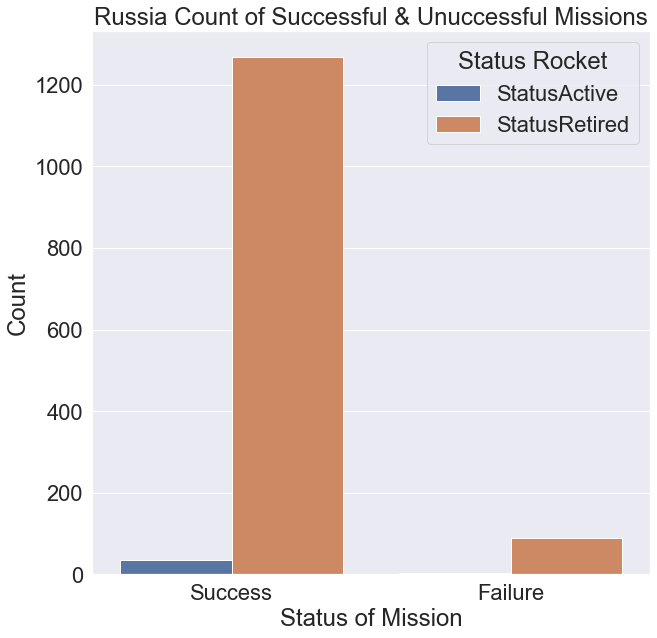

In [28]:
plt.figure(figsize=(10,10))
sns.set(font_scale = 2)

cx = sns.countplot(x='Status Mission', hue='Status Rocket', data=russia)
print('Percentage of success rate')

cx.set_title("Russia Count of Successful & Unuccessful Missions")
cx.set_xlabel('Status of Mission')
cx.set_ylabel('Count')

In [29]:
# success to failure count
print(russia['Status Mission'].value_counts())

Success    1303
Failure      92
Name: Status Mission, dtype: int64


In [30]:
# count each location site
russia['Location'].nunique()

17

In [31]:
# Russia is missing 96% of it's reported cost 
(russia.isnull().sum().sort_values(ascending=False)/len(russia))*100

Cost              96.129032
ID                 0.000000
Company Name       0.000000
Location           0.000000
Date               0.000000
Detail             0.000000
Status Rocket      0.000000
Status Mission     0.000000
dtype: float64

In [32]:
data_copy = data.copy()

<h2>Which day is the most popular for each company to launch?</h2>

In [33]:
# create a copy of the data and add new column  "day"
data_copy['day'] = data_copy['Date'].dt.day_name()

In [34]:
data_copy

,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission,day
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Friday
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thursday
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tuesday
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thursday
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thursday
...,...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wednesday
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,Saturday
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Friday
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sunday


Text(0, 0.5, 'Count')

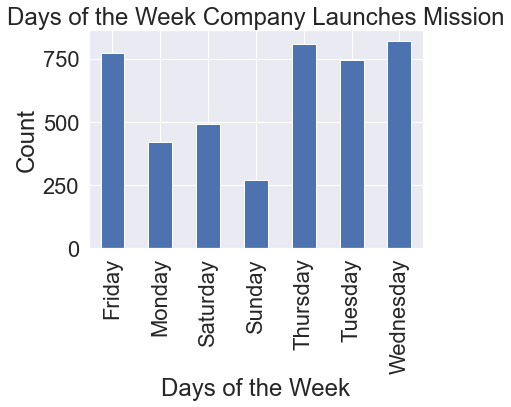

In [35]:
fx = data_copy[['day', 'Company Name']].groupby('day').count().plot(kind='bar',legend=None)
fx.set_title("Days of the Week Company Launches Mission")
fx.set_xlabel('Days of the Week')
fx.set_ylabel('Count')

In [39]:
data_copy['day'].value_counts()

Wednesday    821
Thursday     808
Friday       772
Tuesday      743
Saturday     490
Monday       420
Sunday       270
Name: day, dtype: int64

In [40]:
# In the end I would drop the cost column, I can't justfiy keeping a column where 77% of data is missing. 